In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
import seaborn as sns



### Simulation with Binomial Distribution

A Binomial distribution is used here to simulate cancer tests in a population of 100,000.  It is suitable because it is a discrete distribution and uses Bernoulli trials, each of which has a true or false outcome.  This function is ideal for creating an artificial dataset to simulate cancer tests, since each cancer test also has a true or false outcome in real life. 

The function below runs a single simulated cancer test (n) on each member of the sample population of 100,000. The probability (p) of a positive diagnosis is approximated using the average incidence of cancer in the U.S. between 2011–2015.[]. The histogram below shows the number of negative diagnoses at point zero on the x-axis and positive diagnoses at point 1.0.

In this simulation, the total number of persons diagnosed with cancer in the sample population of 100,000 is 454.
The remaining 99546 people tested negative for cancer.


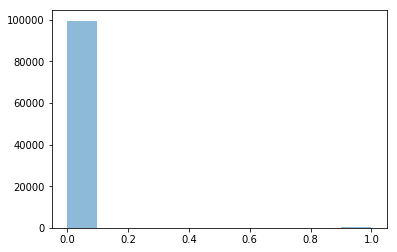

In [2]:
avg_incidence = 439.2/10**5 #Average incidence new cancer diagnoses from the National Cancer Institute (U.S.)
n, p = 1, avg_incidence  # number of trials, probability of each trial
sim = np.random.binomial(n, p, 100000) # The binomial function used for simulation.


dataset = pd.DataFrame(sim)
plt.hist(sim, alpha=0.5)

print('''In this simulation, the total number of persons diagnosed with cancer in the sample population of 100,000 is %d.
The remaining %d people tested negative for cancer.''' % (sim.sum(),10**5-sim.sum()))

### Simulation of Cancer in Males

The binomial distribution function in numpy.random was used to simulate cancer occurence in a sample of 100,000 males in each age interval.  The age intervals adopted from Cancer Research UK are represented below by the 'labels' variable.

The 'male_interval' variable is a Python list containing the average no. of cases per 100,000 of cancer observed in males between 2013-2015 for each age interval.  These averages are used as the probability values in the binomial function below, used to simulate cancer tests in 100,000 patients at each age interval. 

The 'male_distribution' variable contains the simulated dataset for each age interval each time the loop runs. The 'sum_of_male_cases' variable is used to store the number of positive diagnoses from each age interval, and for use in visualising the simulated dataset. The male_distribution variable is reassigned on each iteration (for each interval) and only the positive diagnoses within the dataset are stored.

In [3]:
n = 1  # number of trials
sum_of_male_cases = []


# Probabilities and age intervals from CancerResearchUK
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49']
male_interval = [0.0043,0.00259,0.00227,0.00418,0.00696,0.01086,0.01401,0.01666,0.0271,0.0488]#probability each age interval


# Simulate cancer tests in sample population
male_distribution = []
for i in male_interval:
    p = i
    male_distribution = np.random.binomial(n, p, 100000) #cases per interval using binomial distribution with probabilites from from cancerresearchuk
    sum_of_male_cases.append(male_distribution.sum()) # each age group is tested for cancer and random positives are chosen from the population based on numbers from canceruk.
print(sum_of_male_cases)





[405, 257, 202, 444, 683, 1065, 1369, 1656, 2736, 4744]


#### Simulation of Cancer in Females

As with the simulation of cancer diagnoses in males. A dataset is synthesized for cancer cases in females using numpy's binomial function. The 'female_interval' variable once again contains the probability values adopted from Cancer Research UK.

Again a 'for' loop is used to iterate over the probabilities contained in the 'female_interval' list and numpy's binomial function is used to generate a dataset for each age interval. Positive diagnoses simulated at each age interval are stored in the 'sum_of_female_cases' variable.

In [4]:
sum_of_female_cases = []

female_interval = [0.0037,0.00183,0.00205,0.004,0.00787,0.01682,0.02426,0.03293,0.05755,0.09781]


female_distribution = []
for i in female_interval:
    p = i
    female_distribution = np.random.binomial(n, p, 100000) #cases per interval using binomial distribution with probabilites from from cancerresearchuk
    sum_of_female_cases.append(female_distribution.sum()) # each age group is tested for cancer and random positives are chosen from the population based on numbers from canceruk.
print(sum_of_female_cases)


[354, 193, 208, 426, 779, 1731, 2433, 3272, 5747, 9847]


#### Pandas Dataframe

A Pandas Dataframe was created from the male and female simulation data and added the real cancer data from Cancer Research UK to compare alongside the simulated dataset. The columns named 'Actual Male Cases' and 'Actual Female Cases' contain the real data.

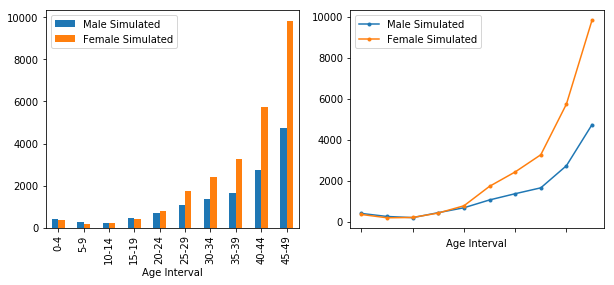

In [5]:
# Create Pandas Dataframe from simulation results
myframe = pd.DataFrame(sum_of_male_cases, columns=['Male Simulated'])

# Add dataframe columns 
myframe['Age Interval'] = labels #created new column in dataframe for interval labels
myframe['Female Simulated'] = sum_of_female_cases
myframe.set_index("Age Interval",drop=True,inplace=True)#used Pandas set index method to set col as index
myframe['Actual Male Cases'] = [430, 259, 227,418,696,1086,1401,1666,2710,4880]
myframe['Actual Female Cases'] = [370,183,205,400,787,1682,2426,3293, 5755,9781]

# Plot results of Binomial Distribution
fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)

ax2=fig.add_subplot(1,2,2)

myframe[['Male Simulated','Female Simulated']].plot(kind='bar',ax=ax1)
#line plot is better visualisation
myframe[['Male Simulated','Female Simulated']].plot(kind='line', marker='.',ax=ax2)

#### Analysis of Simulated Results (plotted above)

It is interesting to note that up to age 24, the incidence of cancer in males and females is very similar, males showing a higher incidence of cancer up to age 19. From age 20 to 49, the simulated data shows a sharper increase in the rates of cancer in the female population. Cancer rates appear to increase in both male and female samples, but the lines diverge more at each interval and show an increasingly higher rate of cancer in females at each interval from age 20 to 49.

The simulated results suggest that up to age 19, males have a slightly higher incidence of cancer than females.  The most striking result is that the simulation indicates young women from their mid-twenties to age fifty may run a significantly higher risk of being diagnosed with cancer as compared with their male counterparts.


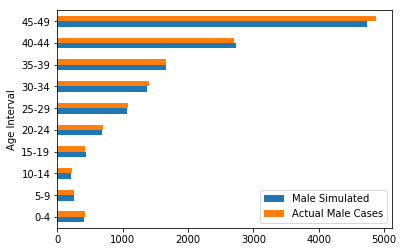

In [6]:
myframe[['Male Simulated','Actual Male Cases']].plot(kind='barh')

#### Simulated vs. Actual

In the horizontal bar chart above, it is clear that the simulated cancer cases are strongly correlated with the actual data from Cancer Research UK.

The difference in no. of cases is seen in the bar chart below. The highest variance between actual and simulated cancer cases is seen in the oldest age interval, 45-49.

In [7]:
sum(myframe.iloc[0:3,3])

758

In [8]:
myframe

,Male Simulated,Female Simulated,Actual Male Cases,Actual Female Cases
Age Interval,,,,
0-4,405,354,430,370
5-9,257,193,259,183
10-14,202,208,227,205
15-19,444,426,418,400
20-24,683,779,696,787
25-29,1065,1731,1086,1682
30-34,1369,2433,1401,2426
35-39,1656,3272,1666,3293
40-44,2736,5747,2710,5755


Text(0,0.5,'% diff from actual')

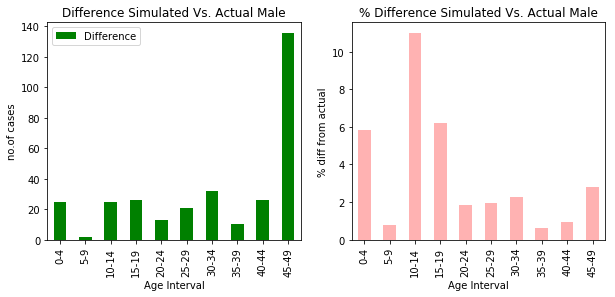

In [31]:
Difference = myframe['Male Simulated']-myframe['Actual Male Cases']
myframe['Difference'] = Difference.abs()
percent_diff_m = myframe['Difference']/myframe['Actual Male Cases']*100

fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)

ax2=fig.add_subplot(1,2,2)

myframe[['Difference']].plot(ax=ax1, kind='bar',color='g',title='Difference Simulated Vs. Actual Male')
ax1.set_ylabel('no.of cases')

percent_diff_m.plot(ax=ax2, kind='bar',color='r', alpha=0.3, title='% Difference Simulated Vs. Actual Male')
ax2.set_ylabel('% diff from actual')

#### Simulation of Cancer Types (Males)

The variable 'Age_inter_2_M' below contains a list of the most common cancers diagnosed in males (0-14 years). random.choice is used to simulate the occurence of the most common cancer types using data from Cancer Research UK. 'type_inter_2_M' contains the cancer type simulation for the male sample in the 0-14 age interval.

In [10]:
Cancer_by_age = pd.DataFrame(columns=['Age','Total Cases'])
Cancer_by_age['Age'] = labels
Cancer_by_age['Total Cases'] = myframe['Male Simulated'].values + myframe['Female Simulated'].values # add values for male & female simulations
Cancer_by_age



Age_inter_2_M = [('Leukaemias'),('Brain'), ('Lymphomas'),('Soft tissue sarcoma'),('SNS'),('Other cancers')]#Most common cancer types in males (0-14 yrs)
type_inter_2_M = np.random.choice(Age_inter_2_M, 916, p=[.31,.26,.13,.07,.05,.18])#Simulated occurence of types of cancer from CancerResearchUK(0-14 yrs)


In [11]:
Cancer_by_age

,Age,Total Cases
0,0-4,759
1,5-9,450
2,10-14,410
3,15-19,870
4,20-24,1462
5,25-29,2796
6,30-34,3802
7,35-39,4928
8,40-44,8483
9,45-49,14591


The 'for' loop in the following cell and list comprehension are used to iterate over the simulated dataset of common cancer types in males i.e. 'type_inter_2_M' and count the number of each cancer type generated by the random.choice function.  The results are appended to 'Common_cancer_M'.

In [12]:
type_inter_2_M = list(type_inter_2_M)

summary_inter_2 = [type_inter_2_M.count(item) for item in Age_inter_2_M]

Common_cancer_M = []
for item in Age_inter_2_M:
    Common_cancer_M.append(type_inter_2_M.count(item))
print(Common_cancer_M)




[285, 229, 126, 63, 51, 162]


#### Simulation of Cancer Types (Females)

The same process is used to simulate the most common cancers in females using data from Cancer Research UK. The simulated dataset is stored in 'type_inter_2_F' and the number of cases of each cancer type are counted and appended to 'Common_cancer_F'.

In [13]:
Age_inter_2_F = ['Leukaemias', 'Brain','Lymphomas','Renal','Soft tissue sarcoma','Other cancers']

#Important
type_inter_2_F = np.random.choice(Age_inter_2_F, 758, p=[.29,.28,.07,.06,.06,.24])
#Simulated occurence of types of cancer from CancerResearchUK(0-14 yrs)

type_inter_2_F = list(type_inter_2_F)

Common_cancer_F = []
for item in Age_inter_2_F:
    Common_cancer_F.append(type_inter_2_F.count(item))
print(Common_cancer_F)

[211, 188, 65, 51, 49, 194]


#### Analysis of Top 5 Cancers

The simulated datasets of cancer types in males and females are converted into Pandas dataframes and concatenated into one dataframe to allow further comparison. Leukaemia appears to be the most prevalent cancer type in both males and females aged 0-14, followed by brain tumours.

In [14]:
a = pd.DataFrame(Common_cancer_M, index=Age_inter_2_M, columns=['Most Common in Males'])#simulated cancer types in males (0-14)
b = pd.DataFrame(Common_cancer_F, index=Age_inter_2_F, columns=['Most Common in Females'])#simulated cancer types in females (0-14)

top_5 = pd.concat([a,b], axis=1, sort=False) #[5]

top_5

,Most Common in Males,Most Common in Females
Leukaemias,285.0,211.0
Brain,229.0,188.0
Lymphomas,126.0,65.0
Soft tissue sarcoma,63.0,49.0
SNS,51.0,NaN
Other cancers,162.0,194.0
Renal,NaN,51.0


#### Scatter Plot of Results

The plot below offers a useful visual comparison of common types of cancers in males versus females.  It is clear that Leukaemia and brain cancers are the most prevalent types in both males and females and also that the incidence in males of this age interval is higher for each type of cancer.

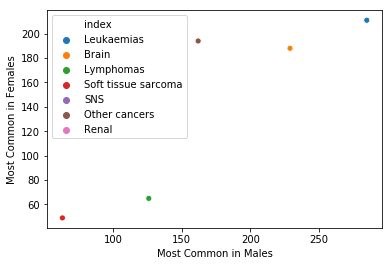

In [15]:
top_5 = top_5.reset_index()


ax = sns.scatterplot(x="Most Common in Males", y="Most Common in Females",hue="index", data=top_5)


In [19]:
summary_inter_2

[285, 229, 126, 63, 51, 162]

https://www.cancerresearchuk.org/health-professional/cancer-statistics/incidence/age#heading-Zero
https://stackoverflow.com/questions/1155539/how-do-i-generate-a-poisson-process/10250877#10250877
https://stackoverflow.com/questions/45747589/copying-a-column-from-one-dataframe-to-another-gives-nan-values

https://www.dataquest.io/blog/adding-axis-labels-to-plots-with-pandas-and-matplotlib/
https://stackoverflow.com/questions/28135436/concatenate-rows-of-two-dataframes-in-pandas
https://www.cancer.gov/about-cancer/understanding/statistics